In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

group_info_df = pd.read_excel('Manifestation Sheet_ Urine Project correct adapter_irf2.xlsx',sheet_name='Clinical sheet ')
# Cast all values in 'Sample ID' of df_groups to string
group_info_df['Sample ID'] = group_info_df['Sample ID'].astype(str)
group_info_df['Sample ID'] = group_info_df['Sample ID'].str.strip()
#group_info_df['Sample Type '] = group_info_df['Sample Type '].str.strip()

# Display the first few rows to verify it loaded correctly
print(group_info_df.head())

# Replace 'your_file.txt' with the path to your TPM data file
file_path = 'TranscriptMatrixSalmon.TPM.txt'

# Load the TPM data into a pandas DataFrame
# Assuming the file is tab-delimited and has a header row
df_tpm = pd.read_csv(file_path, sep='\t')



# Display the first few rows of the DataFrame to verify it loaded correctly
display(df_tpm.head())




   Unnamed: 0 Unnamed: 1 Sample ID   Cancer Pre or Post  \
0         NaN      Nu-16     Nu-16  Healthy         NaN   
1         NaN      Nu-19     Nu-19  Healthy         NaN   
2         NaN      Nu-37     Nu-37  Healthy         NaN   
3         NaN       Nu-2      Nu-2  Healthy         NaN   
4         NaN       Nu-6      Nu-6  Healthy         NaN   

  Surgical Path (Path Report)  pCR (0 = no pCR 1 = pCR) Gender    Class  
0                         NaN                       NaN    NaN  Healthy  
1                         NaN                       NaN    NaN  Healthy  
2                         NaN                       NaN    NaN  Healthy  
3                         NaN                       NaN    NaN  Healthy  
4                         NaN                       NaN    NaN  Healthy  


,WU-Bldr-10B-RCC-004UF2,WU-Bldr-10B-BC009,WU-Bldr-10B-RCC-012UF1,WU-Bldr-10B-WBC-1315,WU-Bldr-10B-Nu-103,WU-Bldr-10B-RCC-006UF2,WU-Bldr-10B-WBC-1174,WU-Bldr-10B-WBC-1321,WU-Bldr-10B-WBC-1203,WU-Bldr-10B-WBC-1269,...,WU-Bldr-10B-BC004,WU-Bldr-10B-WBC-1207,WU-Bldr-10B-WBC-1188,WU-Bldr-10B-BC007,WU-Bldr-10B-BC013,WU-Bldr-10B-Nu-35,WU-Bldr-10B-WBC-1202,WU-Bldr-10B-BC021,WU-Bldr-10B-RCC-010UF2,WU-Bldr-10B-BC022
A1BG,20.476529,53.239954,28.446069,19.421525,21.823778,3.932098,65.899761,2.771520,31.016170,22.199598,...,32.179657,37.025227,22.383805,25.871792,94.468550,22.438174,36.566826,27.708151,23.536168,59.476408
A1BG-AS1,6.138327,1.621566,3.365061,4.073044,2.448397,0.055464,4.461582,0.974672,7.976653,6.952139,...,0.383501,4.960215,0.018317,4.333746,0.209197,1.899183,1.351264,5.906862,0.180704,2.235269
A1CF,24.623015,23.849467,53.393852,39.539100,25.695723,50.782468,38.299795,55.772988,22.985222,9.735866,...,63.792301,27.118696,9.775568,24.445695,60.022127,37.309599,96.287640,34.298834,15.301629,50.461619
A2M,76.017945,67.773604,44.339589,81.860570,61.187662,48.530518,34.358676,42.995540,79.250730,73.089865,...,25.950843,67.158650,220.676393,78.185451,42.219328,85.879794,23.314518,73.477718,20.398432,82.595374
A2M-AS1,4.823564,5.864187,13.365229,11.029637,2.578957,5.298154,5.142130,16.470549,9.845372,15.883533,...,2.928700,3.581795,0.068848,12.489873,4.888716,0.149537,0.566103,6.259076,4.234072,6.967946


In [2]:
# # Read the TSV file without a header
# protein_Coding  = pd.read_csv('../Ensemble_unique_ProteinCodig_genes_sorted.bed', sep='\t', header=None)

# # Extract the fourth column (as a Series)
# fourth_col = protein_Coding[3]

# # Filter the DataFrame using the values in the fourth column
# # Use `.loc[]` and `.isin()` for filtering
# df_tpm = df_tpm.loc[df_tpm.index.isin(fourth_col)]

# print(df_tpm.shape)
# display(df_tpm.head())

# ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
# ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)



# df_tpm = df_tpm[~df_tpm.index.isin(ribo_genes[0].tolist())]

# print(df_tpm.shape)
# display(df_tpm.head())

In [3]:
def get_most_variable_genes(n=1000):
    top_genes = df_tpm.var(axis=1).sort_values(ascending=False).head(n).index
    return top_genes

In [4]:
# Cast all column names of df_tpm to string
df_tpm.columns = df_tpm.columns.astype(str)



In [5]:
# Assuming the common prefix to remove is 'WU-Bldr-10B-'
prefix_to_remove = 'WU-Bldr-10B-'

# Remove the prefix from all column names
df_tpm.columns = df_tpm.columns.str.replace(prefix_to_remove, '')

# Display the updated DataFrame columns to verify
display(df_tpm.head())


,RCC-004UF2,BC009,RCC-012UF1,WBC-1315,Nu-103,RCC-006UF2,WBC-1174,WBC-1321,WBC-1203,WBC-1269,...,BC004,WBC-1207,WBC-1188,BC007,BC013,Nu-35,WBC-1202,BC021,RCC-010UF2,BC022
A1BG,20.476529,53.239954,28.446069,19.421525,21.823778,3.932098,65.899761,2.771520,31.016170,22.199598,...,32.179657,37.025227,22.383805,25.871792,94.468550,22.438174,36.566826,27.708151,23.536168,59.476408
A1BG-AS1,6.138327,1.621566,3.365061,4.073044,2.448397,0.055464,4.461582,0.974672,7.976653,6.952139,...,0.383501,4.960215,0.018317,4.333746,0.209197,1.899183,1.351264,5.906862,0.180704,2.235269
A1CF,24.623015,23.849467,53.393852,39.539100,25.695723,50.782468,38.299795,55.772988,22.985222,9.735866,...,63.792301,27.118696,9.775568,24.445695,60.022127,37.309599,96.287640,34.298834,15.301629,50.461619
A2M,76.017945,67.773604,44.339589,81.860570,61.187662,48.530518,34.358676,42.995540,79.250730,73.089865,...,25.950843,67.158650,220.676393,78.185451,42.219328,85.879794,23.314518,73.477718,20.398432,82.595374
A2M-AS1,4.823564,5.864187,13.365229,11.029637,2.578957,5.298154,5.142130,16.470549,9.845372,15.883533,...,2.928700,3.581795,0.068848,12.489873,4.888716,0.149537,0.566103,6.259076,4.234072,6.967946


In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This import is necessary for 3D plotting

def plot_pca(df_tpm, title, n_components=2, x_lim=None, y_lim=None, z_lim=None):
    """
    Plot PCA of gene expression data by sample type.

    Parameters:
    - df_tpm: DataFrame of TPM values with genes as rows and samples as columns.
    - title: Title for the PCA plot.
    - n_components: Number of principal components to plot (2 or 3).
    - x_lim: Tuple (min, max) for x-axis limits. Default is None, showing the full range.
    - y_lim: Tuple (min, max) for y-axis limits. Default is None, showing the full range.
    - z_lim: Tuple (min, max) for z-axis limits if n_components=3. Default is None.
    """
    # Transpose the DataFrame so that samples are rows and genes are columns
    df_tpm_transposed = df_tpm.T


    # Create a mapping from 'Sample ID' to 'Sample Type'
    group_mapping = group_info_df.set_index('Sample ID')['Class'].to_dict()

    # Map the group names to the sample index in the transposed TPM DataFrame
    sample_groups = df_tpm_transposed.index.to_series().map(group_mapping)

    # Log transformation
    df_log_transformed = np.log2(df_tpm_transposed.astype(float) + 1)

    # Scaling
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_log_transformed)

    # PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df_scaled)

    # Plotting the PCA results with group labels
    if n_components == 2:
        plt.figure(figsize=(10, 8))
        for group in np.unique(sample_groups):
            idx = (sample_groups == group).values
            plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=group, s=100)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    elif n_components == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for group in np.unique(sample_groups):
            idx = (sample_groups == group).values
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], label=group, s=100)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
    
    if n_components == 2:
        if x_lim is not None:
            plt.xlim(x_lim)
        if y_lim is not None:
            plt.ylim(y_lim)
    elif n_components == 3:
        if x_lim is not None:
            ax.set_xlim(x_lim)
        if y_lim is not None:
            ax.set_ylim(y_lim)
        if z_lim is not None and n_components == 3:
            ax.set_zlim(z_lim)

    plt.title(title)
    plt.legend(title='Sample Type')
    plt.show()


In [7]:

#df_tpm = df_tpm.loc[get_xena_gene()]

#df_tpm = df_tpm.loc[get_most_variable_genes(n=1000)]

df_tpm.shape

(56809, 110)

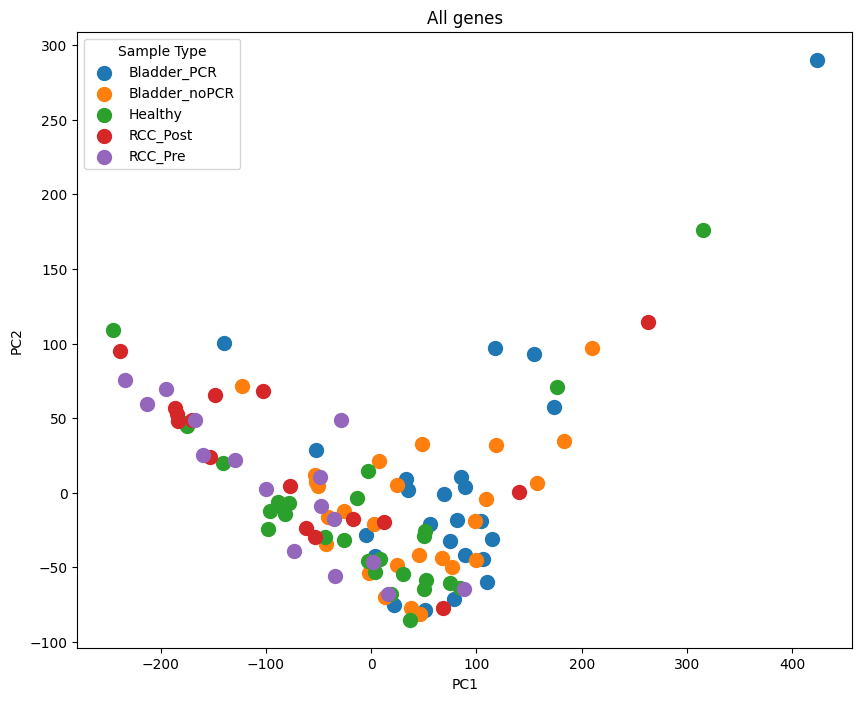

In [8]:
plot_pca(df_tpm,  'All genes')

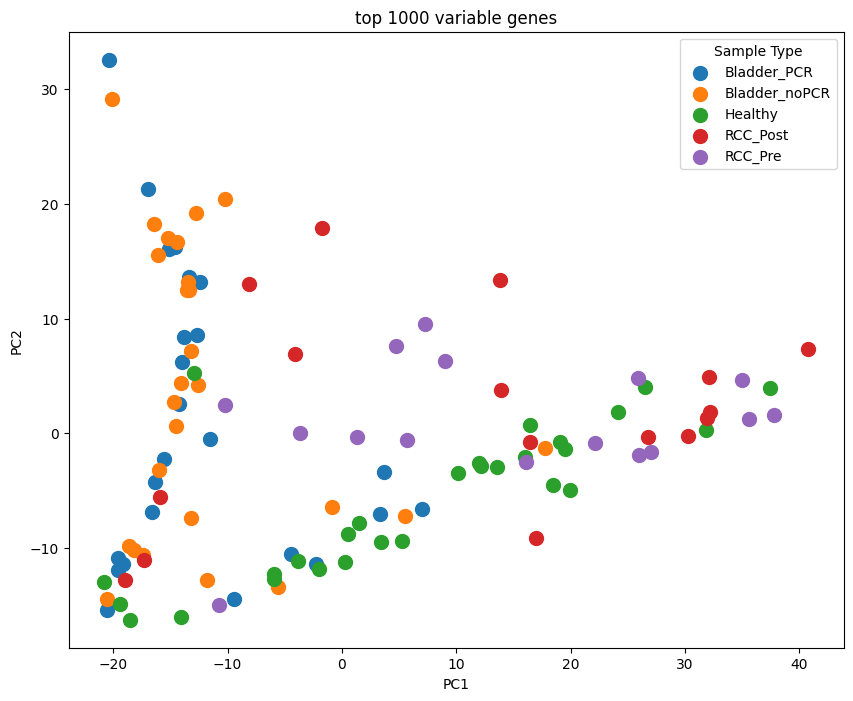

In [9]:
plot_pca(df_tpm.loc[get_most_variable_genes(n=1000)],'top 1000 variable genes')


# ML

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

def reshape_classify_and_plot_roc(data, test_size = 0.2):
    RANDOM_STATE = 0 #42
    # Transpose the data to get observations in rows
    data_transposed = data.T.reset_index()
    labels = data_transposed['index']  # Class labels are now in 'index' column
    features = data_transposed.drop(columns=['index'])  # Features are the remaining data
    
    # Convert labels to a binary format for multiclass ROC
    y = label_binarize(labels, classes=labels.unique())
    n_classes = y.shape[1]
    
    X = features.to_numpy()
    
    # Perform a stratified split to ensure class representation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=RANDOM_STATE)
    
    # Count the number of samples for each class in both the training and testing sets
    class_counts_train = np.sum(y_train, axis=0)
    class_counts_test = np.sum(y_test, axis=0)
    
    # Initialize and train the classifier with OneVsRest strategy for multiclass ROC
    clf = OneVsRestClassifier(RandomForestClassifier(random_state=RANDOM_STATE))
    clf.fit(X_train, y_train)
    

    
    # Predict probabilities for each class
    y_score = clf.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Calculate the average AUC
    avg_auc = np.mean(list(roc_auc.values()))
    
    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(labels.unique()[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    
    # Add class sample counts to the legend
    sample_counts_str = "\n".join([f"'{labels.unique()[i]}': {class_counts_train[i]} training samples, {class_counts_test[i]} testing samples, {class_counts_train[i] + class_counts_test[i]} total" for i in range(n_classes)])
    legend_title = f"Average AUC: {avg_auc:.2f}\n{sample_counts_str}"
    
    # Place the legend outside of the plot
    plt.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig('test_Size_'+str(test_size)+'_roc_curve_plot.png',  bbox_inches='tight')
    plt.show()



    # Extract feature importances
    feature_importances = np.zeros(X_train.shape[1])
    for estimator in clf.estimators_:
        feature_importances += estimator.feature_importances_
    feature_importances /= n_classes
    indices = np.argsort(feature_importances)[::-1] #[:10]
    top_feature_names = features.columns[indices]
    top_importances = feature_importances[indices]

    # Plot the top 10 feature importances
    # plt.figure(figsize=(10, 6))
    # plt.title("Top 10 Feature importances")
    # plt.bar(range(10), top_importances, color="r", align="center")
    # plt.xticks(range(10), top_feature_names, rotation=45)
    # plt.xlim([-1, 10])
    # plt.tight_layout()
    # plt.show()
    # Create and return the DataFrame of top feature importances
    importances_df = pd.DataFrame({
        'Feature': top_feature_names,
        'Importance': top_importances
    }).reset_index(drop=True)


        # Create DataFrame for ROC data
    roc_dfs = []
    for i in range(n_classes):
        df = pd.DataFrame({
            'FPR': fpr[i],
            'TPR': tpr[i],
            'Label': labels.unique()[i]
        })
        roc_dfs.append(df)
    roc_df = pd.concat(roc_dfs, ignore_index=True)
    
    # Save to CSV
    roc_df.to_csv('test_Size_'+str(test_size)+'_roc_info.csv', index=False)

    importances_df.to_csv('test_Size_'+str(test_size)+'_feature_importance.csv', index=False)
    

   
    

In [11]:
def ML(df, nfeature = 1000,test_size=0.2):
    df = df.copy()
    df = df.loc[get_most_variable_genes(n=nfeature)]
    print(df.shape)
    reshape_classify_and_plot_roc(df,test_size)

   

In [12]:
group_mapping = group_info_df.set_index('Sample ID')['Class'].to_dict()
group_mapping

{'Nu-16': 'Healthy',
 'Nu-19': 'Healthy',
 'Nu-37': 'Healthy',
 'Nu-2': 'Healthy',
 'Nu-6': 'Healthy',
 'Nu-22': 'Healthy',
 'Nu-32': 'Healthy',
 'Nu-33': 'Healthy',
 'Nu-39': 'Healthy',
 'Nu-21': 'Healthy',
 'Nu-36-A': 'Healthy',
 'Nu-38': 'Healthy',
 'Nu-5-A': 'Healthy',
 'Nu-31': 'Healthy',
 'Nu-70': 'Healthy',
 'Nu-35': 'Healthy',
 'Nu-102': 'Healthy',
 'Nu-83': 'Healthy',
 'Nu-1': 'Healthy',
 'Nu-3': 'Healthy',
 'Nu-20': 'Healthy',
 'Nu-40': 'Healthy',
 'Nu-97': 'Healthy',
 'Nu-103': 'Healthy',
 'ID80': 'Healthy',
 '71': 'Healthy',
 '74': 'Healthy',
 '75': 'Healthy',
 'RCC-003UF2': 'RCC_Post',
 'RCC-008UF2': 'RCC_Post',
 'RCC-002UF2': 'RCC_Post',
 'RCC-004UF2': 'RCC_Post',
 'RCC-005UF2': 'RCC_Post',
 'RCC-006UF2': 'RCC_Post',
 'RCC-012UF2': 'RCC_Post',
 'RCC-013UF2': 'RCC_Post',
 'RCC-015UF2': 'RCC_Post',
 'RCC-009UF2': 'RCC_Post',
 'RCC-016UF2': 'RCC_Post',
 'RCC017UF2': 'RCC_Post',
 'RCC-018UF2': 'RCC_Post',
 'RCC-010UF2': 'RCC_Post',
 'RCC-019UF2': 'RCC_Post',
 'RCC-001UF2': 'R

In [13]:
display(df_tpm.head())
display(df_tpm.rename(columns=group_mapping).head())

,RCC-004UF2,BC009,RCC-012UF1,WBC-1315,Nu-103,RCC-006UF2,WBC-1174,WBC-1321,WBC-1203,WBC-1269,...,BC004,WBC-1207,WBC-1188,BC007,BC013,Nu-35,WBC-1202,BC021,RCC-010UF2,BC022
A1BG,20.476529,53.239954,28.446069,19.421525,21.823778,3.932098,65.899761,2.771520,31.016170,22.199598,...,32.179657,37.025227,22.383805,25.871792,94.468550,22.438174,36.566826,27.708151,23.536168,59.476408
A1BG-AS1,6.138327,1.621566,3.365061,4.073044,2.448397,0.055464,4.461582,0.974672,7.976653,6.952139,...,0.383501,4.960215,0.018317,4.333746,0.209197,1.899183,1.351264,5.906862,0.180704,2.235269
A1CF,24.623015,23.849467,53.393852,39.539100,25.695723,50.782468,38.299795,55.772988,22.985222,9.735866,...,63.792301,27.118696,9.775568,24.445695,60.022127,37.309599,96.287640,34.298834,15.301629,50.461619
A2M,76.017945,67.773604,44.339589,81.860570,61.187662,48.530518,34.358676,42.995540,79.250730,73.089865,...,25.950843,67.158650,220.676393,78.185451,42.219328,85.879794,23.314518,73.477718,20.398432,82.595374
A2M-AS1,4.823564,5.864187,13.365229,11.029637,2.578957,5.298154,5.142130,16.470549,9.845372,15.883533,...,2.928700,3.581795,0.068848,12.489873,4.888716,0.149537,0.566103,6.259076,4.234072,6.967946


,RCC_Post,Bladder_PCR,RCC_Pre,Bladder_noPCR,Healthy,RCC_Post,Bladder_PCR,Bladder_noPCR,Bladder_PCR,Bladder_noPCR,...,Bladder_noPCR,Bladder_PCR,Bladder_noPCR,Bladder_PCR,Bladder_PCR,Healthy,Bladder_noPCR,Bladder_PCR,RCC_Post,Bladder_noPCR
A1BG,20.476529,53.239954,28.446069,19.421525,21.823778,3.932098,65.899761,2.771520,31.016170,22.199598,...,32.179657,37.025227,22.383805,25.871792,94.468550,22.438174,36.566826,27.708151,23.536168,59.476408
A1BG-AS1,6.138327,1.621566,3.365061,4.073044,2.448397,0.055464,4.461582,0.974672,7.976653,6.952139,...,0.383501,4.960215,0.018317,4.333746,0.209197,1.899183,1.351264,5.906862,0.180704,2.235269
A1CF,24.623015,23.849467,53.393852,39.539100,25.695723,50.782468,38.299795,55.772988,22.985222,9.735866,...,63.792301,27.118696,9.775568,24.445695,60.022127,37.309599,96.287640,34.298834,15.301629,50.461619
A2M,76.017945,67.773604,44.339589,81.860570,61.187662,48.530518,34.358676,42.995540,79.250730,73.089865,...,25.950843,67.158650,220.676393,78.185451,42.219328,85.879794,23.314518,73.477718,20.398432,82.595374
A2M-AS1,4.823564,5.864187,13.365229,11.029637,2.578957,5.298154,5.142130,16.470549,9.845372,15.883533,...,2.928700,3.581795,0.068848,12.489873,4.888716,0.149537,0.566103,6.259076,4.234072,6.967946


In [14]:
df_tpm_labeled = df_tpm.rename(columns=group_mapping)

In [15]:
#ML(df_tpm_labeled)

In [16]:
df_tpm_labeled2 = df_tpm_labeled.copy()
df_tpm_labeled2.columns = ['Bladder' if col == 'Bladder_PCR' else col for col in df_tpm_labeled2.columns]
df_tpm_labeled2.columns = ['Bladder' if col == 'Bladder_noPCR' else col for col in df_tpm_labeled2.columns]
df_tpm_labeled2.columns = ['RCC' if col == 'RCC_Pre' else col for col in df_tpm_labeled2.columns]
df_tpm_labeled2.columns = ['RCC' if col == 'RCC_Post' else col for col in df_tpm_labeled2.columns]

(1000, 110)


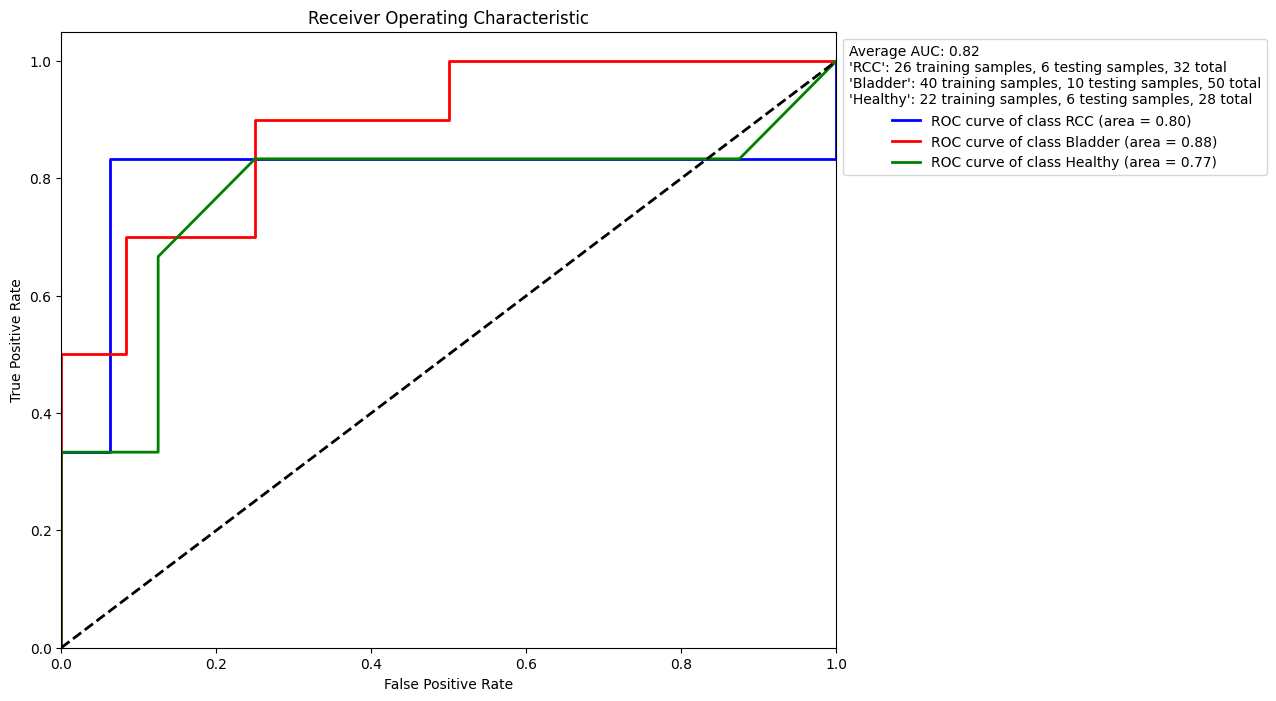

In [17]:
ML(df_tpm_labeled2)

(1000, 110)


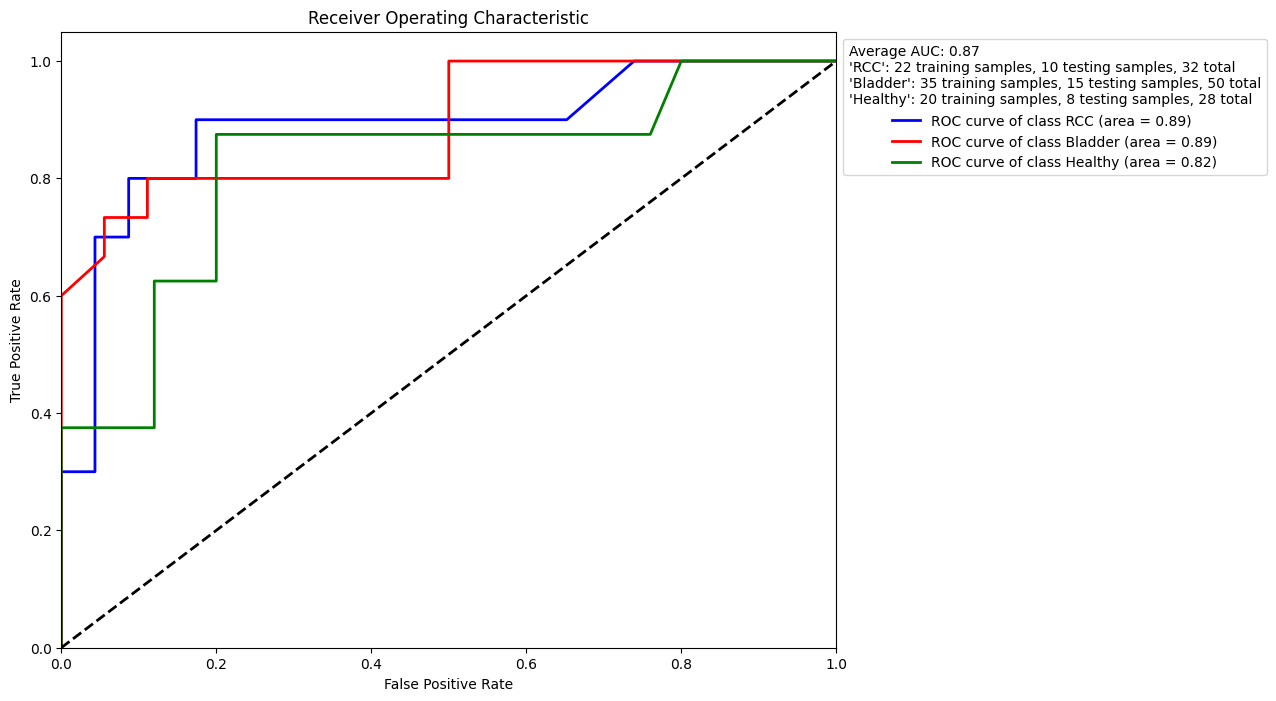

In [18]:
ML(df_tpm_labeled2,test_size = 0.3)

(1000, 110)


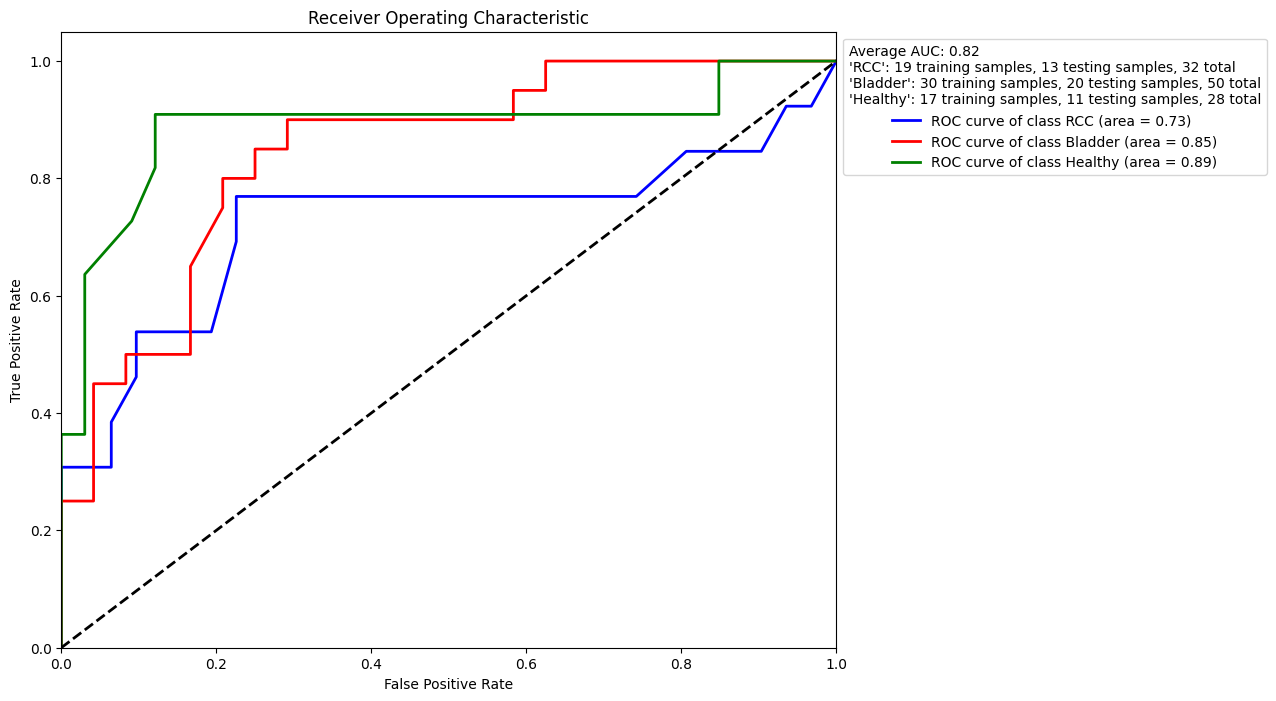

In [19]:
ML(df_tpm_labeled2,test_size = 0.4)

In [20]:
df_tpm_labeled3 = df_tpm_labeled.copy()
df_tpm_labeled3.columns = ['RCC' if col == 'RCC_Pre' else col for col in df_tpm_labeled3.columns]
df_tpm_labeled3.columns = ['RCC' if col == 'RCC_Post' else col for col in df_tpm_labeled3.columns]
#ML(df_tpm_labeled3)

In [21]:
from collections import Counter
# Getting the frequency of each column name
column_names = list(df_tpm_labeled.columns)
frequency = Counter(column_names)

print(frequency)

Counter({'Healthy': 28, 'Bladder_noPCR': 26, 'Bladder_PCR': 24, 'RCC_Post': 16, 'RCC_Pre': 16})
